# Week 3 HW

## 1번 문제

## import data

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head() # CCAvg: 월 카드 사용량 

,Age,Experience,Income,Family,CCAvg
0,25,1,49,4,1.6
1,45,19,34,3,1.5
2,39,15,11,1,1.0
3,35,9,100,1,2.7
4,35,8,45,4,1.0


In [5]:
# 결측치 확인 
data.isnull().sum()

Age           0
Experience    0
Income        0
Family        0
CCAvg         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         2500 non-null   int64  
 1   Experience  2500 non-null   int64  
 2   Income      2500 non-null   int64  
 3   Family      2500 non-null   int64  
 4   CCAvg       2500 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 97.8 KB


In [9]:
y = data['Income']
X = data.drop(['Income'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1000)

## Linear Regression

In [10]:
reg = LinearRegression()
results1 = reg.fit(x_train, y_train)

In [11]:
reg.coef_

array([-3.07793956,  2.89401562, -3.37220023, 16.09065086])

## Ridge Regression

In [12]:
rreg = Ridge(alpha = 0) # alpha = Lambda
rreg.fit(x_train, y_train)

Ridge(alpha=0)

In [13]:
rreg.coef_

array([-3.07793956,  2.89401562, -3.37220023, 16.09065086])

In [14]:
alpha = np.logspace(-1, 3, 7)
alpha

array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03])

In [15]:
df = []
acc_table = []

for i, a in enumerate(alpha):
    rreg = Ridge(alpha=a).fit(x_train, y_train)
    df.append(pd.Series(np.hstack([rreg.intercept_, rreg.coef_])))
    pred_y = rreg.predict(x_test)

df_ridge = pd.DataFrame(df,index = alpha).T
df_ridge

,0.100000,0.464159,2.154435,10.000000,46.415888,215.443469,1000.000000
0,132.291303,132.273724,132.192264,131.817002,130.134334,123.419922,105.704966
1,-3.077732,-3.076976,-3.073472,-3.057321,-2.984746,-2.692192,-1.883048
2,2.893806,2.893043,2.889505,2.873198,2.799903,2.504097,1.681685
3,-3.372122,-3.371839,-3.370525,-3.364435,-3.336394,-3.211243,-2.731156
4,16.090363,16.089313,16.084442,16.061871,15.957890,15.491679,13.634454


## Lasso Regression

In [16]:
lreg = Lasso(alpha = 0 ) # alpha = Lambda
lreg.fit(x_train, y_train)

<ipython-input-16-b25edddec866>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lreg.fit(x_train, y_train)
C:\Users\LEE RY\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\LEE RY\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1105890.1320882086, tolerance: 373.84840920000005
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0)

In [17]:
lreg.coef_

array([-3.07790231,  2.8939786 , -3.37220244, 16.09065156])

In [19]:
df = []
acc_table = []

for i, a in enumerate(alpha):
    lreg = Lasso(alpha=a).fit(x_train, y_train)
    df.append(pd.Series(np.hstack([lreg.intercept_, lreg.coef_])))
    pred_y = lreg.predict(x_test)
    
df_lasso = pd.DataFrame(df,index = alpha).T
df_lasso

,0.100000,0.464159,2.154435,10.000000,46.415888,215.443469,1000.000000
0,128.945930,116.782383,60.545587,54.569493,71.087642,73.876,73.876
1,-2.949074,-2.481245,-0.318549,-0.134206,-0.000000,-0.000,-0.000
2,2.765340,2.298193,0.138608,-0.000000,-0.000000,-0.000,-0.000
3,-3.311548,-3.090592,-2.064482,-0.000000,-0.000000,-0.000,-0.000
4,16.065558,15.974154,15.549730,13.184919,1.449031,0.000,0.000


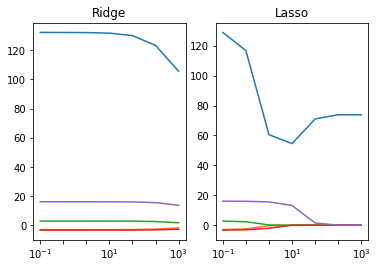

In [20]:
import matplotlib.pyplot as plt

ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha)
plt.title("Ridge")

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title("Lasso")

plt.show()

## 2번 문제

In [21]:
from IPython.display import Image

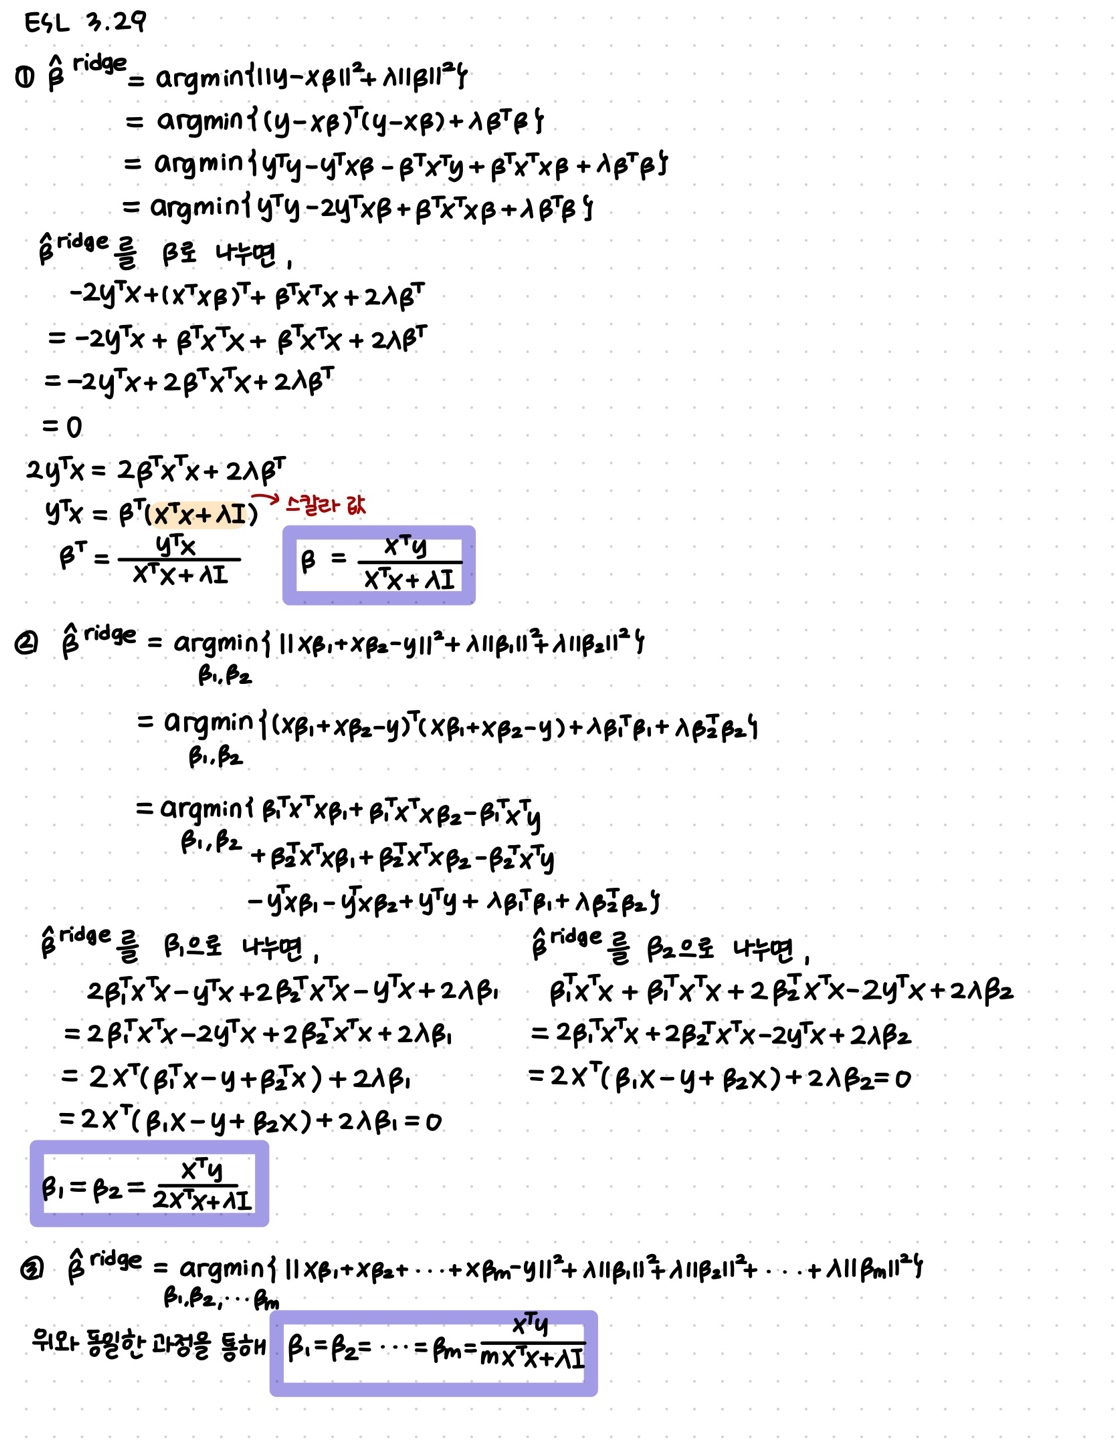

In [23]:
Image('HW week 3.jpg')